In [40]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing

%matplotlib inline

In [41]:
# load dataset
df = pd.read_csv("project/resources/Hotels_data_Changed.csv")
df.describe()

,Unnamed: 0,Snapshot ID,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Stars,DayDiff,DiscountDiff,DiscountPerc
count,187848.000000,187848.000000,187848.0,187848.000000,187848.000000,187848.000000,187848.000000,187848.000000,187848.000000,187848.000000,187848.000000
mean,93923.500000,351.643451,5.0,1825.742143,1673.172283,2.434186,14.588561,3.905823,0.579176,152.569860,8.877715
std,54227.191021,1007.348927,0.0,1042.355712,983.618013,1.005191,41.575482,0.846496,11.746683,143.316985,6.030248
min,0.000000,1.000000,5.0,289.000000,260.000000,1.000000,-1.000000,0.000000,-30.000000,15.000000,0.581395
25%,46961.750000,150.000000,5.0,1160.000000,1035.000000,2.000000,-1.000000,3.000000,-7.000000,70.000000,4.844961
50%,93923.500000,439.000000,5.0,1599.000000,1475.000000,2.000000,-1.000000,4.000000,-1.000000,103.000000,7.056229
75%,140885.250000,506.000000,5.0,2160.000000,1963.250000,3.000000,8.000000,4.000000,8.000000,180.000000,10.933941
max,187847.000000,417419.000000,5.0,29975.000000,28675.000000,4.000000,431.000000,5.000000,30.000000,3760.000000,68.425842


In [42]:
df2 = df.select_dtypes(include=[object])
df2.columns


Index(['Snapshot Date', 'Checkin Date', 'Hotel Name', 'WeekDay'], dtype='object')

In [43]:
# TODO: create a LabelEncoder object and fit it to each feature in X

# This would first require an integer encoding, such as 1, 2, 3. This would be followed by a one hot encoding of integers to a binary vector with 3 values, such as [1, 0, 0].

# The sequence provides at least one example of every possible value in the sequence. Therefore we can use automatic methods to define the mapping of labels to integers and integers to binary vectors.

# In this example, we will use the encoders from the scikit-learn library. Specifically, the LabelEncoder of creating an integer encoding of labels and the OneHotEncoder for creating a one hot encoding of integer encoded values.


# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
# integer encode
le = preprocessing.LabelEncoder()

# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
integer_encoded = df2.apply(le.fit_transform)
print(integer_encoded['WeekDay'].head(8))

list(le.inverse_transform(list(integer_encoded['WeekDay'].head(8))))


0    6
1    6
2    4
3    3
4    6
5    0
6    3
7    6
Name: WeekDay, dtype: int64


['Wednesday',
 'Wednesday',
 'Thursday',
 'Sunday',
 'Wednesday',
 'Friday',
 'Sunday',
 'Wednesday']

In [44]:
for row in integer_encoded:
    df[row] = integer_encoded[row]


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

y = df["Discount Code"]
# Split dataset in training and test datasets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.5, random_state=int(time.time()))

In [46]:
# Instantiate the classifier
gnb = GaussianNB()
used_features = [
    "WeekDay",
    "Snapshot Date",
    "Checkin Date",
    "DayDiff",
    "Hotel Name"
]

# Train classifier
gnb.fit(
    X_train[used_features].values,
    y_train
)
y_pred = gnb.predict(X_test[used_features])


/Users/barzrihan/.conda/envs/data_science_02/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


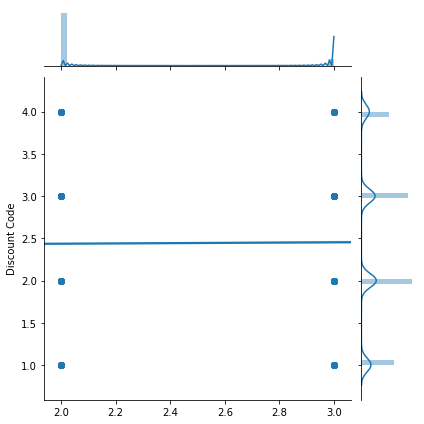

In [47]:
sns.jointplot(y_pred, y_test, kind="reg")

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    0 17398  2063     0]
 [    0 26701  3524     0]
 [    0 24486  3432     0]
 [    0 14568  1752     0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00     19461
           2       0.32      0.88      0.47     30225
           3       0.32      0.12      0.18     27918
           4       0.00      0.00      0.00     16320

   micro avg       0.32      0.32      0.32     93924
   macro avg       0.16      0.25      0.16     93924
weighted avg       0.20      0.32      0.20     93924



/Users/barzrihan/.conda/envs/data_science_02/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/barzrihan/.conda/envs/data_science_02/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/barzrihan/.conda/envs/data_science_02/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


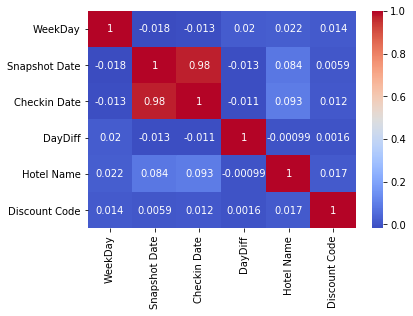

In [52]:
ax = sns.heatmap(df[used_features + ["Discount Code"]].corr(), cmap='coolwarm', annot=True)


In [53]:
clf = tree.DecisionTreeClassifier()
clf.fit(X=X_train[used_features].values, y=y_train)
clf.feature_importances_
y_pred = clf.predict(X_test[used_features])

In [54]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[ 6962  7796  3286  1417]
 [ 9029 10531  8319  2346]
 [ 5870  9640  8286  4122]
 [ 3590  4111  4776  3843]]
              precision    recall  f1-score   support

           1       0.27      0.36      0.31     19461
           2       0.33      0.35      0.34     30225
           3       0.34      0.30      0.32     27918
           4       0.33      0.24      0.27     16320

   micro avg       0.32      0.32      0.32     93924
   macro avg       0.32      0.31      0.31     93924
weighted avg       0.32      0.32      0.31     93924



In [ ]:
# cross validation
